# In this notebook we change the parameters in a second order, constant coefficient, homogeneous problem, and see how the solutions behave as these parameters vary.

The initial value problem considered is of the form

$y''+py'+qy=0$ with initial conditions

$y(0)=\alpha$, $y'(0)=\beta$.

If the characterisc equation has repeated roots $r$, the solution looks like

$y(t) = \alpha e^{rt} + (\beta + \alpha p /2)te^{rt}$

with $r=-p/2$

Otherwise the solution looks like

$y(t) = \frac{\beta-\alpha r_2}{r_1 - r_2} e^{r_1t} + \frac{\alpha r_1 - \beta}{r_1 - r_2}e^{r_2t}$

with $r_1 = \frac{-p+\sqrt{p^2-4q}}{2}$ and $r_2 = \frac{-p-\sqrt{p^2-4q}}{2}$

In particular, if the roots are complex conjugate, we simplify the solution to be:

$y(t) = C_1 e^{-p/2t}\cos(\frac{t\sqrt{4q-p^2}}{2}) + C_2e^{-p/2t}\sin(\frac{t\sqrt{4q-p^2}}{2})$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Function, Eq, dsolve, Derivative, simplify, E, Symbol

In [ ]:
## hyperparameters for visualization
N = 40000
endt = 4
t = np.linspace(0,endt,num = N, endpoint = False)

In [ ]:
def solutions(p, q, alpha, beta):
  if p**2 - 4 * q == 0:
    y1 = np.exp(-p/2 * t)
    y2 = t * y1
    y = alpha * y1 + (beta + alpha * p/2) *y2

  elif p**2 - 4 * q > 0:
    r1 = (-p + np.sqrt(p**2 - 4 * q))/2
    r2 = (-p - np.sqrt(p**2 - 4 * q))/2
    y1 = np.exp(r1 * t)
    y2 = np.exp(r2 * t)
    y = ((beta -alpha * r2)/(r1 - r2)) * y1 + ((alpha * r1 - beta)/(r1 - r2)) * y2

  else:
    y1 = np.exp(-p/2*t)*np.cos((t*np.sqrt(4*q - p**2))/2)
    y2 = np.exp(-p/2*t)*np.sin((t*np.sqrt(4*q - p**2))/2)
    y = alpha * np.exp(-p/2*t)*np.cos((t*np.sqrt(4*q - p**2))/2) + ((2 * beta + alpha * p)/(np.sqrt(4 * q - p**2))) * np.exp(-p/2*t)*np.sin((t*np.sqrt(4*q - p**2))/2)

  return y1, y2, y

## Visualization

Here we plot three curves to show the solution:

1. $y_1$ and $y_2$: the fundamental set of solutions respectively

2. the solution of the initial value problem to see the summed behavior of the IVP

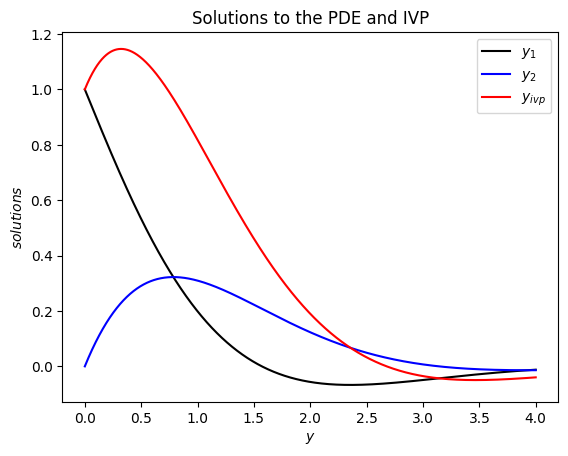

In [ ]:


# p, q, alpha, beta = 3, 2, 1, 1 # real distinct
# p, q, alpha, beta = 2, 1, 1, 1 # repeated
p, q, alpha, beta = 2, 2, 1, 1 # complex conjugate

y1, y2, y = solutions(p, q, alpha, beta)

####### Plot solution curves
line1 = plt.plot(t,y1,'k',label="$y_1$") #
line2 = plt.plot(t,y2,'b',label="$y_2$") #
line = plt.plot(t,y,'r',label="$y_{ivp}$") #
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc = 3,
          ncol = 3, mode="expand", borderaxespad = -0.2)
plt.legend(loc = 'upper right')
plt.title("Solutions to the PDE and IVP")

plt.ylabel('$solutions$')
plt.xlabel('$y$')
plt.show()